In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math

In [2]:
df = pd.read_csv('/Users/deepanshu/Documents/Semester 3/Bloomberg/Dataset/tesla_dataset.csv')

In [3]:
df.head(10)

,Date,Last Price,Open Price,High Price,Low Price,Volume
0,5/13/2022,769.59,773.48,787.35,751.565,30716908
1,5/12/2022,728.00,701.00,759.66,680.000,46770952
2,5/11/2022,734.00,795.00,809.77,727.200,32408152
3,5/10/2022,800.04,819.31,825.36,774.250,28133876
4,5/9/2022,787.11,836.45,845.63,781.150,30270074
5,5/6/2022,865.65,887.00,888.00,843.105,24301036
6,5/5/2022,873.28,939.21,945.60,857.700,30839732
7,5/4/2022,952.62,903.94,955.50,885.280,27214568
8,5/3/2022,909.25,903.18,924.08,888.590,21236524
9,5/2/2022,902.94,860.77,906.36,848.030,25260456


In [5]:
df.shape

(507, 6)

In [6]:
#Reversed the column order
df = df.loc[::-1].reset_index(drop=True)
df

,Date,Last Price,Open Price,High Price,Low Price,Volume
0,5/12/2020,161.882,165.400,168.658,161.600,79534528
1,5/13/2020,158.192,164.166,165.200,152.660,95327456
2,5/14/2020,160.666,156.000,160.672,152.800,68410944
3,5/15/2020,159.834,158.070,161.010,157.310,52592140
4,5/18/2020,162.726,165.556,166.944,160.776,58490512
...,...,...,...,...,...,...
502,5/9/2022,787.110,836.450,845.630,781.150,30270074
503,5/10/2022,800.040,819.310,825.360,774.250,28133876
504,5/11/2022,734.000,795.000,809.770,727.200,32408152
505,5/12/2022,728.000,701.000,759.660,680.000,46770952


In [7]:
df.shape

(507, 6)

In [8]:
df.describe()

,Last Price,Open Price,High Price,Low Price,Volume
count,507.000000,507.000000,507.000000,507.000000,5.070000e+02
mean,679.582588,679.954653,696.236856,662.604199,3.829159e+07
std,260.643201,261.549649,267.584267,254.502807,2.534804e+07
min,158.192000,156.000000,160.672000,152.660000,9.800558e+06
25%,448.520000,450.045000,461.970000,437.942000,2.227571e+07
50%,691.050000,690.110000,706.700000,673.700000,3.011216e+07
75%,863.790000,857.520000,878.015000,840.195000,4.511972e+07
max,1229.910000,1234.410000,1243.490000,1217.000000,2.221262e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        507 non-null    object 
 1   Last Price  507 non-null    float64
 2   Open Price  507 non-null    float64
 3   High Price  507 non-null    float64
 4   Low Price   507 non-null    float64
 5   Volume      507 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 23.9+ KB


In [11]:
x = df[['Open Price','High Price','Low Price','Volume']].values
y = df['Last Price'].values

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

In [13]:
regressor = LinearRegression()

In [31]:
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
print(regressor.coef_)

[-4.01974450e-01  3.56249716e-01  1.06601734e+00  1.87853994e-07]


In [16]:
print(regressor.intercept_)

-9.472412207246975


In [17]:
predicted = regressor.predict(x_test)

In [18]:
compare = pd.DataFrame({'Orignal': y_test.flatten(),'Predicted': predicted.flatten()})

In [34]:
compare.head(10)

,Orignal,Predicted
0,735.720,737.959458
1,1114.000,1102.616190
2,640.390,631.182556
3,975.990,950.278476
4,475.050,486.193169
5,176.592,178.212522
6,1028.150,1019.371310
7,756.990,757.851424
8,710.920,721.894862
9,413.980,415.016252


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error: 9.58185750635081


In [22]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 184.0609342320926


In [23]:
print('Root Mean Squared Error:' , math.sqrt(metrics.mean_squared_error(y_test, predicted)))                                                

Root Mean Squared Error: 13.566905845921266


In [24]:
r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'%')

99.7606822829674 %


In [33]:
graph = compare.head(20)

<AxesSubplot:>

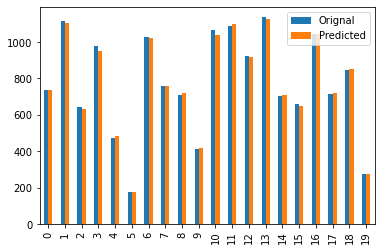

In [41]:
graph.plot(kind='bar')